<a href="https://colab.research.google.com/github/sharadnataraj96/Gas-Turbine-Emission-prediction/blob/SVM/Gas_Turbine_SVM_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_1 = pd.read_csv("/content/drive/My Drive/Dataset/gt_2011.csv")
X= data_1.iloc[:, :-2].values
Y=data_1.iloc[:, -2:].values

In [4]:
print(X)

[[   4.5878 1018.7      83.675  ...  549.83    134.67     11.898 ]
 [   4.2932 1018.3      84.235  ...  550.05    134.67     11.892 ]
 [   3.9045 1018.4      84.858  ...  550.19    135.1      12.042 ]
 ...
 [   7.2647 1006.3      99.496  ...  537.32    110.19     10.483 ]
 [   7.006  1006.8      99.008  ...  541.24    110.74     10.533 ]
 [   6.9279 1007.2      97.533  ...  545.85    111.58     10.583 ]]


In [5]:
print(Y)

[[ 0.32663 81.952  ]
 [ 0.44784 82.377  ]
 [ 0.45144 83.776  ]
 ...
 [ 7.9632  90.912  ]
 [ 6.2494  93.227  ]
 [ 4.9816  92.498  ]]


In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)

X = sc_x.fit_transform(X)
Y = sc_y.fit_transform(Y)

In [7]:
print(Y)

[[ 0.32663 81.952  ]
 [ 0.44784 82.377  ]
 [ 0.45144 83.776  ]
 ...
 [ 7.9632  90.912  ]
 [ 6.2494  93.227  ]
 [ 4.9816  92.498  ]]


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [9]:
y_co_train = y_train[ :, :1]
y_co_test = y_test[ :, :1]
y_nox_train = y_train[ :, 1:]
y_nox_test = y_test[ :, 1:]

In [10]:
print(y_co_train)

[[1.4727 ]
 [0.35244]
 [1.4391 ]
 ...
 [0.62331]
 [1.7197 ]
 [0.92423]]


In [11]:
sc_y_co = StandardScaler()
sc_y_nox = StandardScaler()
y_co_train = sc_y_co.fit_transform(y_co_train)
y_co_test = sc_y_co.fit_transform(y_co_test)
y_nox_train = sc_y_nox.fit_transform(y_nox_train)
y_nox_test = sc_y_nox.fit_transform(y_nox_test)

In [12]:
print(y_co_train)

[[-0.05320553]
 [-0.65972612]
 [-0.07139692]
 ...
 [-0.51307424]
 [ 0.08052288]
 [-0.35015298]]


In [13]:
from sklearn.svm import SVR
regressor_co = SVR(kernel = 'rbf')
regressor_nox = SVR(kernel = 'rbf')
regressor_co.fit(X_train, y_co_train)
regressor_nox.fit(X_train, y_nox_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [14]:
y_pred_co = regressor_co.predict(X_test)
y_pred_nox = regressor_nox.predict(X_test)

In [15]:
print(y_pred_co)

[-0.17744477 -0.37537395 -0.39452503 ... -0.32577198 -0.3165547
 -0.35753007]


In [16]:
rss_co= np.sum(np.square(y_co_test - y_pred_co))
print(rss_co)

3720348.175928895


In [17]:
rss_nox= np.sum(np.square(y_nox_test - y_pred_nox))
print(rss_nox)

4294565.198161719


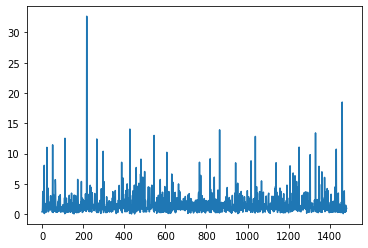

In [18]:
plt.plot(sc_y_co.inverse_transform(y_co_test))

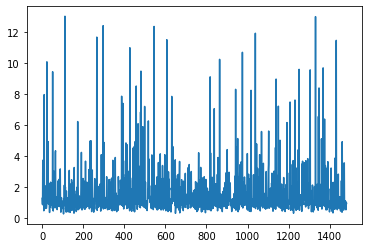

In [19]:
plt.plot(sc_y_co.inverse_transform(y_pred_co))

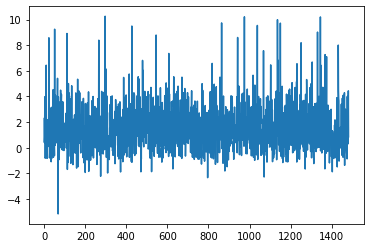

In [20]:
plt.plot(sc_y_co.inverse_transform(y_nox_test))

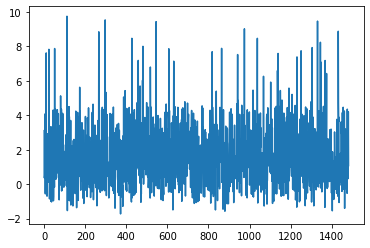

In [21]:
plt.plot(sc_y_co.inverse_transform(y_pred_nox))